# Лабораторная работа 2 | Рылов А.Д М80-407Б-21

## 1. Выбор начальных условий


Для задачи регрессии взят [набор данных](https://www.kaggle.com/datasets/bilalabdulmalik/top-300-asian-universities-qs-rankings-2024) – датасет метрик университетов азиатских стран. Целевая метрика – столбец `Overall Score`. Соответственно, выбраны следующие метрики качества:

1. **Mean Absolute Error (MAE)** – среднее отклонение прогноза модели от истинного значения.
  
2. **Mean Squared Error (MSE)** – среднеквадратичная ошибка для выявления крупных отклонений в прогнозах.
   
3. **Root Mean Squared Error (RMSE)** – Корень из среднеквадратичной ошибки для сравнения с MAE.
   
4. **R-squared (R²)** – коэффициент детерминации для сравнения со средним значением

**Практическая ценность**: Выяснить, какие факторы оказывают наибольшее влияние на качество образования в университете.

Для задачи классификации взят [набор данных](https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset) – датасет с характеристиками грибов (размеры шляпки, цвет ножки и тд). Целевой переменной является столбец `class`` (Poisonous or Not, т.е. ядовитый гриб или нет, True если ядовитый). Соответственно, выбраны следующие метрики качества::

1. **Accuracy** – Точность для оценки общей точности модели
2. **Precision** – Точность для положительного класса чтобы минимизировать ложные срабатывания
3. **Recall** – Полнота, для минимизации ложных отрицаний

4. **F1-score** – Среднее гармоническое Precision и Recall

**Практическая ценность**: модель, обученную на этом наборе данных могут использовать дроны-сборщики съедобных грибов (или, наоборот, ядовитых).

## 2.1	Создание бейзлайна (регрессия)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

file_path = '/content/topuniversities.csv'
data = pd.read_csv(file_path)
data.head()

,Rank,Ordinal Rank,University Name,Overall Score,City,Country,Citations per Paper,Papers per Faculty,Academic Reputation,Faculty Student Ratio,Staff with PhD,International Research Center,International Students,Outbound Exchange,Inbound Exchange,International Faculty,Employer Reputation
0,1,1,Peking University,100.0,Beijing,China,96.4,79.8,100.0,98.6,90.7,98.0,69.1,100.0,88.5,83.2,100.0
1,2,2,The University of Hong Kong,99.7,Pokfulam,Hong Kong,99.5,55.0,100.0,93.3,97.4,98.4,100.0,100.0,99.8,100.0,96.8
2,3,3,National University of Singapore (NUS),98.9,Singapore,Singapore,99.9,57.4,100.0,85.8,82.5,99.9,99.2,97.6,93.4,100.0,99.9
3,4,4,Nanyang Technological University,98.3,Singapore,Singapore,100.0,53.8,100.0,93.0,67.0,99.7,98.8,97.9,90.5,100.0,98.8
4,5,5,Fudan University,97.2,Shanghai,China,92.1,63.1,99.8,92.5,73.4,92.1,81.0,94.9,99.5,98.9,99.5


In [4]:
target = 'Overall Score'
features = ['Citations per Paper', 'Papers per Faculty', 'Academic Reputation',
            'Faculty Student Ratio', 'Staff with PhD', 'International Research Center',
            'International Students', 'Outbound Exchange', 'Inbound Exchange',
            'International Faculty', 'Employer Reputation']

X = data[features].copy()
y = data[target]

X = X.fillna(X.mean())
y = y.fillna(y.mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r_squared)


Mean Absolute Error (MAE): 0.22534004821635042
Mean Squared Error (MSE): 0.10166932369342692
Root Mean Squared Error (RMSE): 0.3188562743516692
R-squared (R²): 0.9997213455929823


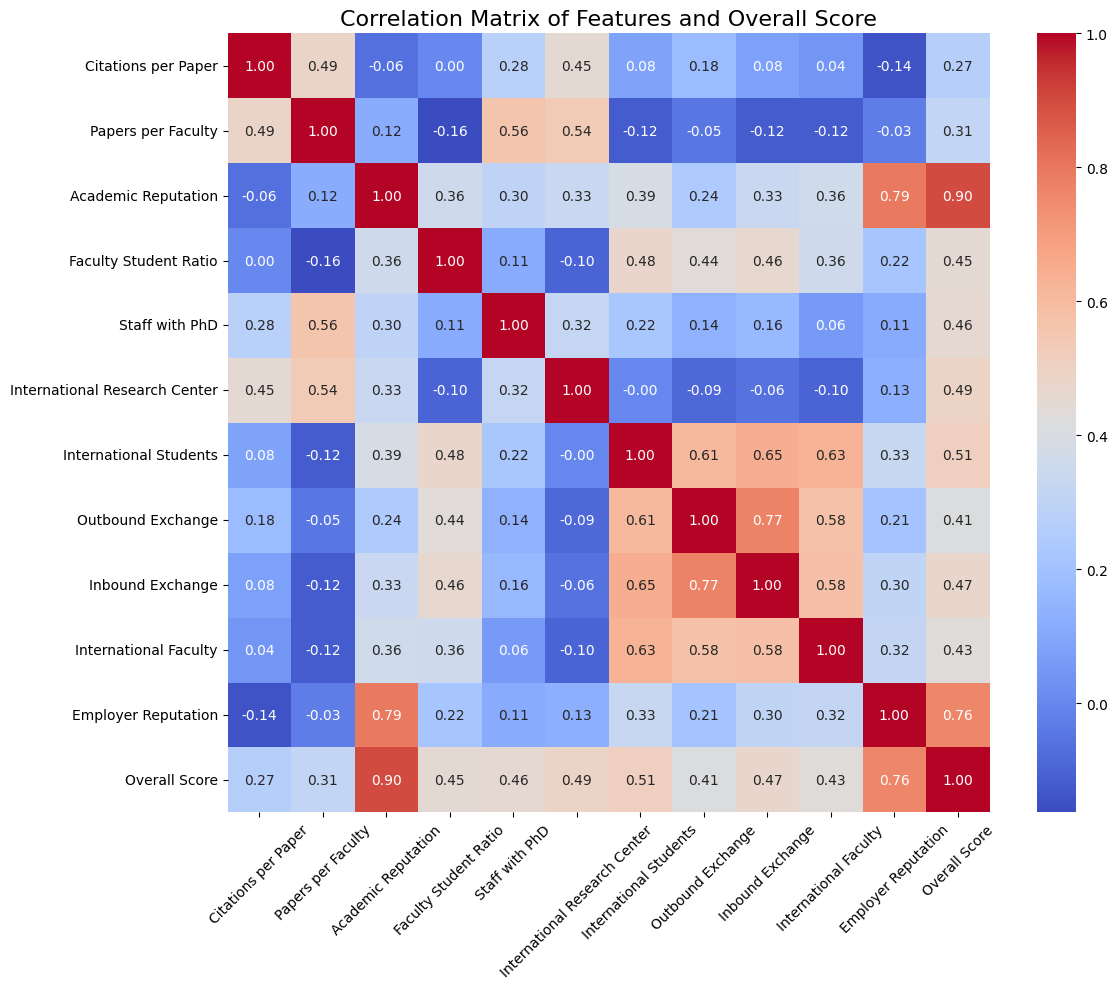

In [7]:
features = ['Citations per Paper', 'Papers per Faculty', 'Academic Reputation',
            'Faculty Student Ratio', 'Staff with PhD', 'International Research Center',
            'International Students', 'Outbound Exchange', 'Inbound Exchange',
            'International Faculty', 'Employer Reputation']
target = 'Overall Score'

correlation_matrix = data[features + [target]].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Features and Overall Score", fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


Как видно из корреляционной матрицы, все входные признаки коррелируют с целевым Overall Score. Благодаря этому, модель линейной регрессии оказалась чрезвычайно точной, дальнейшие улучшения здесь не требуются

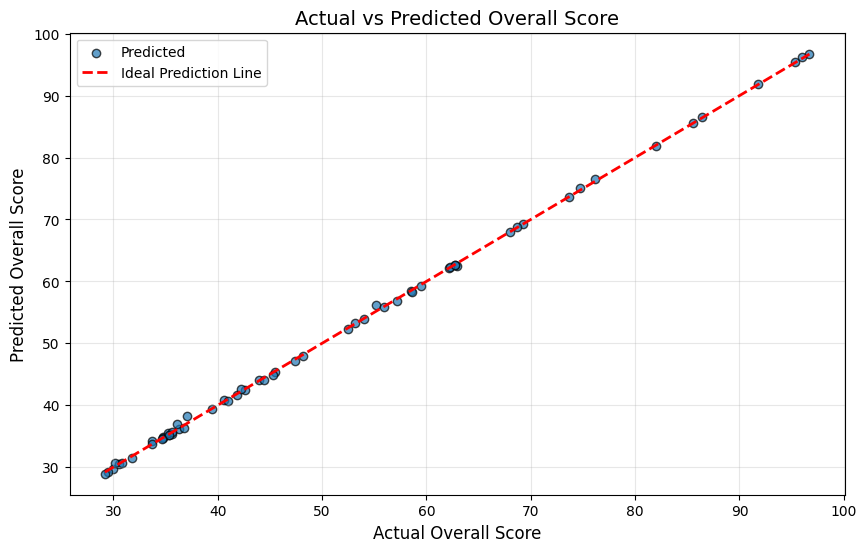

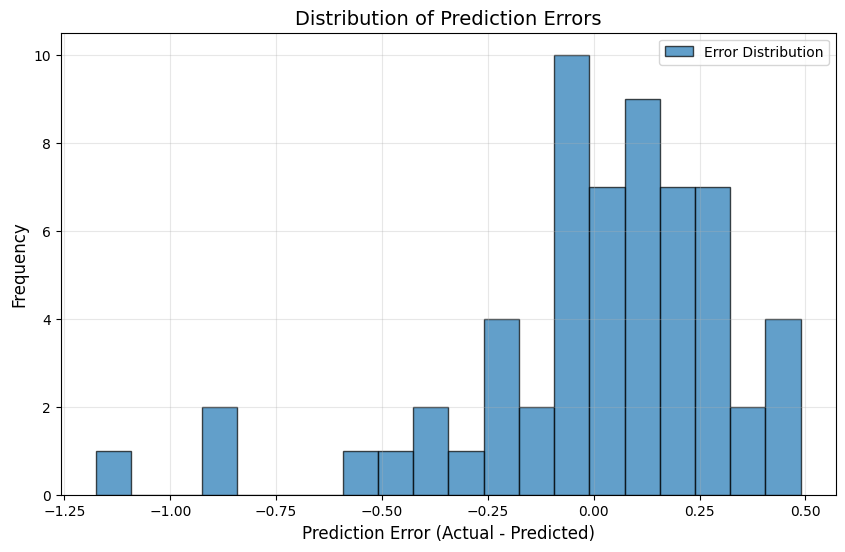

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Prediction Line')
plt.xlabel('Actual Overall Score', fontsize=12)
plt.ylabel('Predicted Overall Score', fontsize=12)
plt.title('Actual vs Predicted Overall Score', fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()

errors = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=20, edgecolor='k', alpha=0.7, label='Error Distribution')
plt.xlabel('Prediction Error (Actual - Predicted)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Prediction Errors', fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()


## 4.1	Имплементация алгоритма машинного обучения (регрессия)

In [13]:
target = 'Overall Score'
features = ['Citations per Paper', 'Papers per Faculty', 'Academic Reputation',
            'Faculty Student Ratio', 'Staff with PhD', 'International Research Center',
            'International Students', 'Outbound Exchange', 'Inbound Exchange',
            'International Faculty', 'Employer Reputation']

X = data[features].copy()
y = data[target]

X = X.fillna(X.mean())
y = y.fillna(y.mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class LinearRegressionCustom:
    def __init__(self):
        self.weights = None

    def fit(self, X, y):
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        self.weights = np.linalg.inv(X.T @ X) @ X.T @ y

    def predict(self, X):
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        return X @ self.weights

model = LinearRegressionCustom()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r_squared)


Mean Absolute Error (MAE): 0.22534004821627937
Mean Squared Error (MSE): 0.10166932369340188
Root Mean Squared Error (RMSE): 0.3188562743516299
R-squared (R²): 0.9997213455929823


## Сравнение результатов

|Метрика|Linear Custom |Linear Sklearn|
|-|-|-|
|MAE|0.23|0.22|
|MSE|0.10|0.10|
|RMSE|0.32|0.31|
|R-squared|0.99970|0.99972|

#### Результаты модели sklearn лучше, но незначительно. В целом обе модели очень точны

## 2.2	Создание бейзлайна (классификация)

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.utils import resample

file_path = '/content/mushroom_cleaned.csv'
data = pd.read_csv(file_path)
data.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [15]:
data = pd.get_dummies(data, drop_first=True)

X = data.drop(columns=["class"])
y = data["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)

y_pred = log_reg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

classification_report_full = classification_report(y_test, y_pred, target_names=["edible", "poisonous"])

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print("\nClassification Report:")
print(classification_report_full)



Accuracy: 0.6365318774868141
Precision: 0.6514452644526445
Recall: 0.7183791115632417
F1-score: 0.6832768908240606

Classification Report:
              precision    recall  f1-score   support

      edible       0.61      0.54      0.57      4909
   poisonous       0.65      0.72      0.68      5898

    accuracy                           0.64     10807
   macro avg       0.63      0.63      0.63     10807
weighted avg       0.63      0.64      0.63     10807



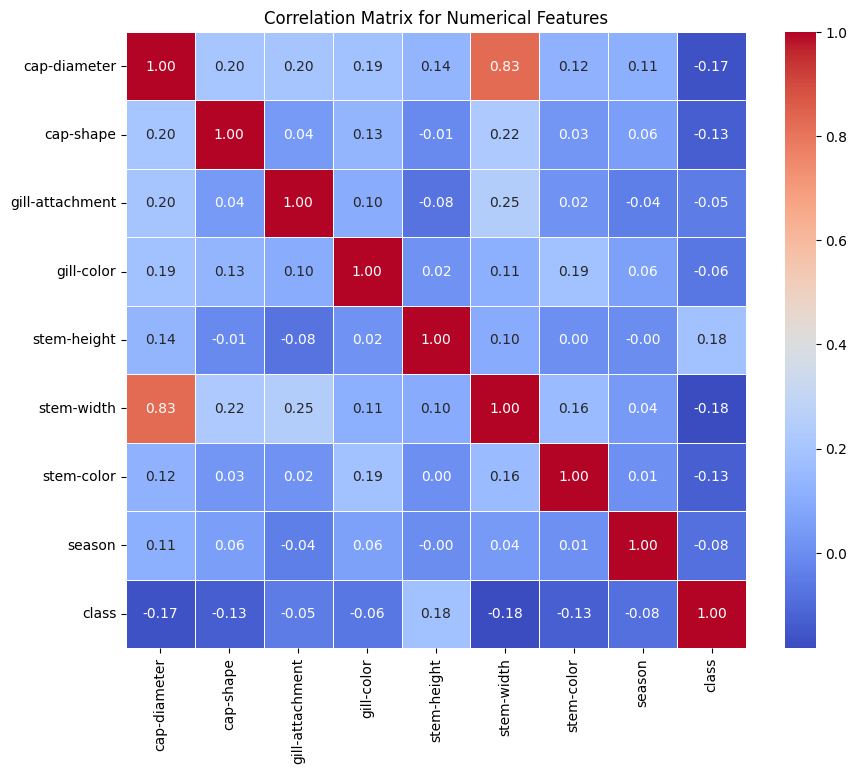

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = data.select_dtypes(include=['float64', 'int64']).columns

correlation_matrix = data[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Numerical Features")
plt.show()

Из матрицы корреляции видно, что признаки очень мало связаны друг с другом. Это объясняет, почему итоговая точность невысока


## 3.2	Улучшение бейзлайна (классификация)


### Как можно улучшить
+ Балансировка классов (Oversampling) - в датасете количество ядовитых грибов на 20% превосходит количество съедобных
+ Подобрать гиперпараметры c помощью RandomizedSearchCV


In [ ]:
class_0 = data[data['class'] == 0]
class_1 = data[data['class'] == 1]

class_0_upsampled = resample(class_0, replace=True, n_samples=len(class_1), random_state=42)
data_oversampled = pd.concat([class_0_upsampled, class_1])

X_oversampled = data_oversampled.drop(columns=["class"])
y_oversampled = data_oversampled["class"]

X_train_oversampled, X_test_oversampled, y_train_oversampled, y_test_oversampled = train_test_split(
    X_oversampled, y_oversampled, test_size=0.2, random_state=42
)

X_train_sampled, _, y_train_sampled, _ = train_test_split(X_train_oversampled, y_train_oversampled, test_size=0.8, random_state=42)

param_dist = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2'],
    'class_weight': [None, 'balanced']
}

random_search = RandomizedSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='f1',
    random_state=42
)

random_search.fit(X_train_sampled, y_train_sampled)

best_log_reg_sampled = random_search.best_estimator_

y_pred_best_sampled = best_log_reg_sampled.predict(X_test_oversampled)

accuracy_best_sampled = accuracy_score(y_test_oversampled, y_pred_best_sampled)
precision_best_sampled = precision_score(y_test_oversampled, y_pred_best_sampled, pos_label=1)
recall_best_sampled = recall_score(y_test_oversampled, y_pred_best_sampled, pos_label=1)
f1_best_sampled = f1_score(y_test_oversampled, y_pred_best_sampled, pos_label=1)

classification_report_best_sampled = classification_report(y_test_oversampled, y_pred_best_sampled, target_names=["edible", "poisonous"])

best_params_sampled = random_search.best_params_

print(f"Accuracy: {accuracy_best_sampled}")
print(f"Precision: {precision_best_sampled}")
print(f"Recall: {recall_best_sampled}")
print(f"F1-score: {f1_best_sampled}")
print("\nClassification Report:")
print(classification_report_best_sampled)
print("\nBest Parameters:", best_params_sampled)


Accuracy: 0.6441449031171019
Precision: 0.6557553956834532
Recall: 0.6121558092679651
F1-score: 0.6332059742966307

Classification Report:
              precision    recall  f1-score   support

      edible       0.63      0.68      0.65      5914
   poisonous       0.66      0.61      0.63      5956

    accuracy                           0.64     11870
   macro avg       0.64      0.64      0.64     11870
weighted avg       0.64      0.64      0.64     11870


Best Parameters: {'solver': 'lbfgs', 'penalty': 'l2', 'class_weight': None, 'C': 1000}


## Сравнение результатов

|Метрика|Base|Improved|
|-|-|-|
|Accuracy|0.636|0.644|
|Precision|0.651|0.655|
|Recall|0.71|0.61|
|F1-score|0.68|0.63|



В целом, несмотря на улучшения, значительного прироста метрик добиться не удалось

## 4.2	Имплементация алгоритма машинного обучения (классификация)

---



In [17]:
class LogisticRegressionCustom:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Градиентный спуск
        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]

X = data.drop(columns=["class"]).values
y = data["class"].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

custom_model = LogisticRegressionCustom(learning_rate=0.01, epochs=1000)
custom_model.fit(X_train, y_train)

y_pred_custom = custom_model.predict(X_test)

accuracy_custom = accuracy_score(y_test, y_pred_custom)
precision_custom = precision_score(y_test, y_pred_custom)
recall_custom = recall_score(y_test, y_pred_custom)
f1_custom = f1_score(y_test, y_pred_custom)

print(f"Accuracy: {accuracy_custom}")
print(f"Precision: {precision_custom}")
print(f"Recall: {recall_custom}")
print(f"F1-score: {f1_custom}")


<ipython-input-17-f552a9933ce9>:13: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Accuracy: 0.5325252151383363
Precision: 0.5401328273244782
Recall: 0.9652424550695151
F1-score: 0.6926633410390558


## Сравнение результатов
|Метрика|Base Sklearn|Base Custom|
|-|-|-|
|Accuracy|0.636|0.53|
|Precision|0.651|0.54|
|Recall|0.71|0.96|
|F1-score|0.68|0.69|

Модель предсказывает почти все ядовитые грибы правильно, но за счет большого количества ложных срабатываний (низкий Precision).


### Кастомная реализация с улучшенным бейзлайном

### Как можно улучшить
+ Масштабировать данные и избежать ошибок переполнения

In [18]:
class LogisticRegressionCustom:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Градиентный спуск
        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

custom_model_scaled = LogisticRegressionCustom(learning_rate=0.01, epochs=1000)
custom_model_scaled.fit(X_train_scaled, y_train_scaled)

y_pred_custom_scaled = custom_model_scaled.predict(X_test_scaled)

accuracy_custom_scaled = accuracy_score(y_test_scaled, y_pred_custom_scaled)
precision_custom_scaled = precision_score(y_test_scaled, y_pred_custom_scaled)
recall_custom_scaled = recall_score(y_test_scaled, y_pred_custom_scaled)
f1_custom_scaled = f1_score(y_test_scaled, y_pred_custom_scaled)

print(f"Accuracy: {accuracy_custom_scaled}")
print(f"Precision: {precision_custom_scaled}")
print(f"Recall: {recall_custom_scaled}")
print(f"F1-score: {f1_custom_scaled}")


Accuracy: 0.6428240954936615
Precision: 0.6582298136645963
Recall: 0.7187182095625636
F1-score: 0.6871454044415627


|Метрика|Sklearn improved|Custom Improved|
|-|-|-|
|Accuracy|0.644|0.642|
|Precision|0.655|0.658|
|Recall|0.718|0.612|
|F1-score|0.687|0.633|

#### Метрики примерно соотвествуют тому, что получилось с использованием sklearn.

## Выводы
Первый датасет оказался идеальным для линейной регрессии. Библиотечный и самописный вариант выдают очень точные результаты без дополнительных улучшений.
Логистическая регрессия, наоборот, плохо справилась со своим датасетом, Accuracy > 0.65 не удалось достичь даже улучшенным версиям моделей